##Python Casestudy By Pratima Chougale on Startup Funding Data[EDA]

##Introduction

The Indian startup ecosystem has experienced a remarkable surge in funding activity over the past decade. Understanding the dynamics of this funding—such as which startups receive the most investment, the dominant investor types, sector-wise trends, and geographic distributions—can reveal valuable insights about the market and entrepreneurial growth patterns.

This Exploratory Data Analysis (EDA) project is focused on analyzing a real-world dataset of startup funding events in India. The goal is to uncover key trends, identify influential players (startups, investors, sectors), and understand the temporal and spatial aspects of startup investments.

Through thorough data cleaning, transformation, and visualization techniques, this case study presents:

- Trends in funding amounts over time

- Top-funded startups and sectors

- Leading cities and investors

- Investment types dominating the ecosystem

- Sector-wise and founder-wise analysis

- Time-series decomposition to observe patterns

This analysis aims to support entrepreneurs, investors, and policymakers by offering data-driven insights into how startup capital flows in India.

In [ ]:
# Exploratory Data Analysis (EDA) - Startup Funding Dataset with Insights and Visualizations

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Set Seaborn style
sns.set(style="whitegrid")

Load the Dataset

In [26]:
df = pd.read_csv("/content/startup funding.csv")
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,9/1/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


Step 2 :

In [27]:
print(df.shape)

(3044, 10)


In [28]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [30]:
df.describe()

,Sr No
count,3044.000000
mean,1522.500000
std,878.871435
min,1.000000
25%,761.750000
50%,1522.500000
75%,2283.250000
max,3044.000000


In [31]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [32]:
# Step 1: Clean Column Names
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [33]:
# Step 2: Convert Date to datetime format
df['Date_dd/mm/yyyy'] = pd.to_datetime(df['Date_dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')


In [34]:
# --- Handling Missing Values and Undisclosed Funding ---
# Step 3: Clean 'Amount_in_USD'
df['Amount_in_USD'] = df['Amount_in_USD'].astype(str).str.replace(',', '').str.strip()
df['Amount_in_USD'] = pd.to_numeric(df['Amount_in_USD'], errors='coerce')


In [35]:
# Step 4: Drop rows with missing key values
df_clean = df.dropna(subset=['Startup_Name', 'Amount_in_USD'])


In [36]:
# Step 5: Add Year Column
df_clean['Year'] = df_clean['Date_dd/mm/yyyy'].dt.year
df_clean['Month'] = df_clean['Date_dd/mm/yyyy'].dt.to_period('M')

<ipython-input-36-1302657017>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['Date_dd/mm/yyyy'].dt.year
<ipython-input-36-1302657017>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Month'] = df_clean['Date_dd/mm/yyyy'].dt.to_period('M')


In [37]:
# Univariate Analysis and Insights

<ipython-input-38-1930154944>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_startups.values, y=top_startups.index, palette="Blues_r")


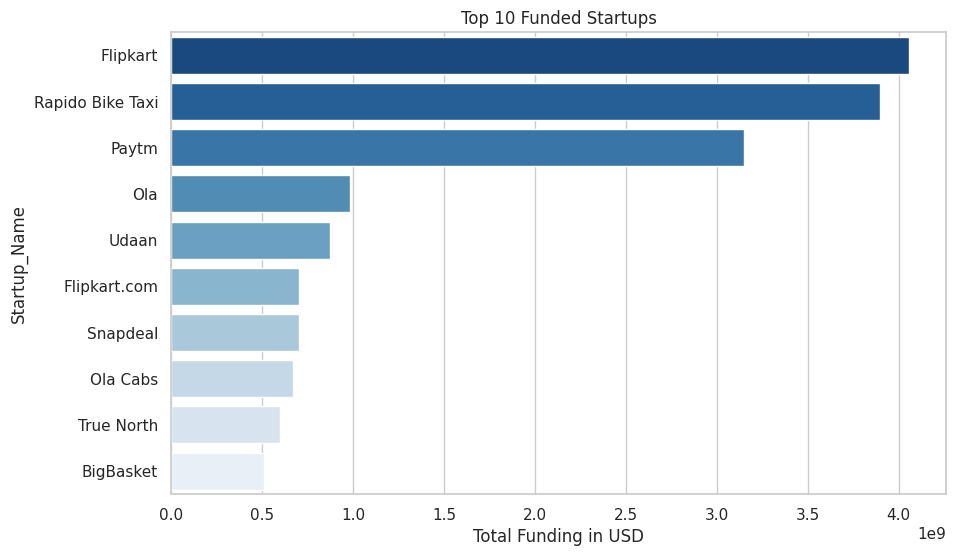

In [38]:
# Top 10 Most Funded Startups
top_startups = df_clean.groupby('Startup_Name')['Amount_in_USD'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_startups.values, y=top_startups.index, palette="Blues_r")
plt.title('Top 10 Funded Startups')
plt.xlabel('Total Funding in USD')
plt.show()


Insight: These startups have raised significantly more than others. It may indicate higher investor confidence or larger scale operations.

<ipython-input-39-1435412217>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="Greens")


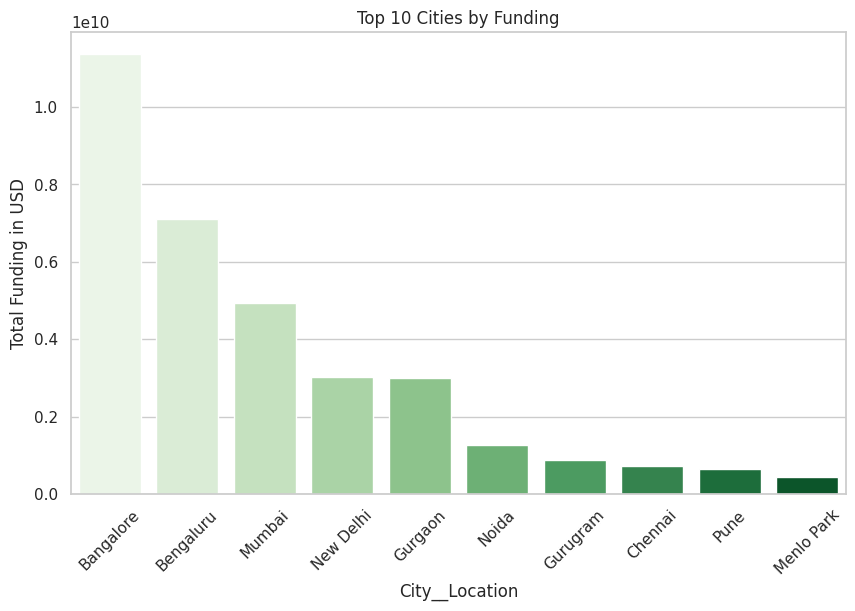

In [39]:
# Top 10 Cities by Total Funding
top_cities = df_clean.groupby('City__Location')['Amount_in_USD'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="Greens")
plt.title('Top 10 Cities by Funding')
plt.ylabel('Total Funding in USD')
plt.xticks(rotation=45)
plt.show()


Insight: Bengaluru dominates as India's startup capital, followed by Mumbai and Delhi NCR. These hubs attract most VC attention.

<ipython-input-40-218871642>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_investors.values, y=top_investors.index, palette="Oranges")


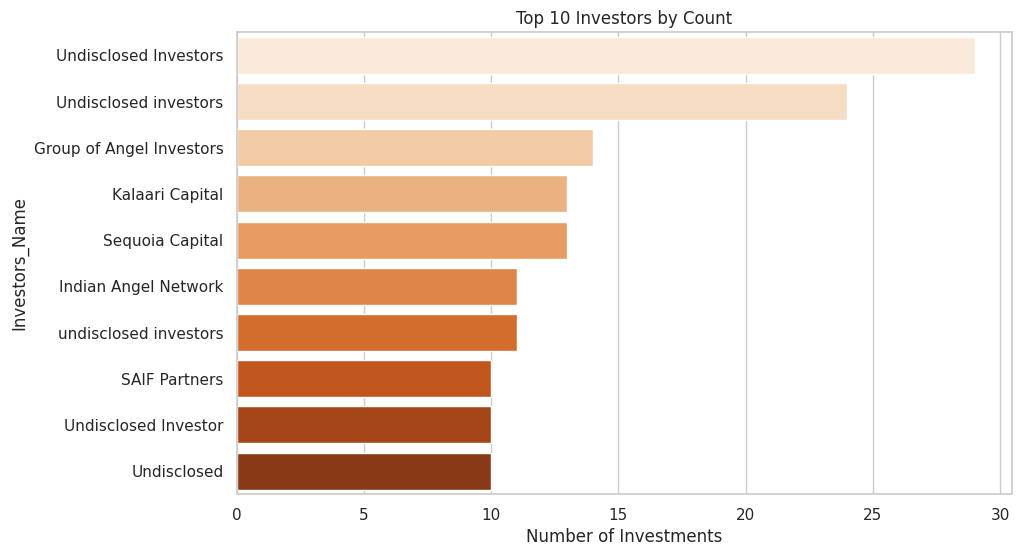

In [40]:
# Top 10 Most Frequent Investors
top_investors = df_clean['Investors_Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_investors.values, y=top_investors.index, palette="Oranges")
plt.title('Top 10 Investors by Count')
plt.xlabel('Number of Investments')
plt.show()


Insight: Frequent investors may indicate active venture capital firms or angel investors playing a large role in early-stage funding.

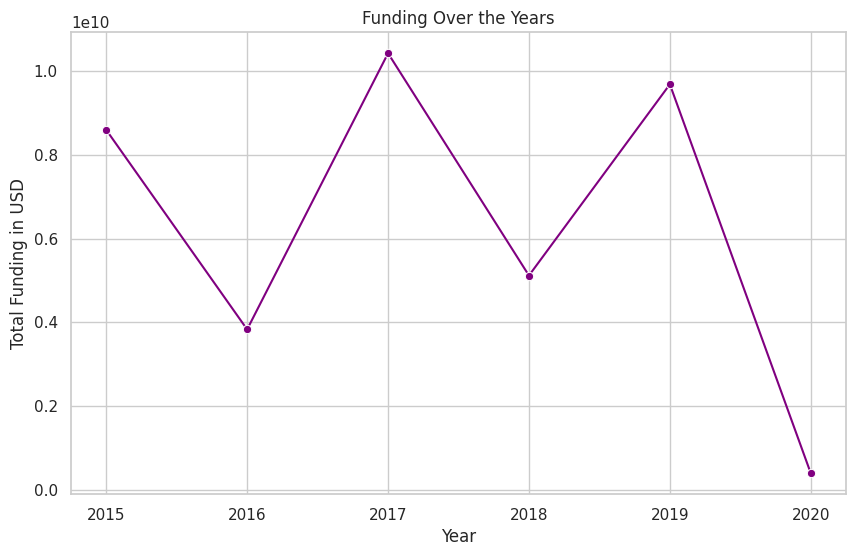

In [41]:
funding_by_year = df_clean.groupby('Year')['Amount_in_USD'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=funding_by_year.index, y=funding_by_year.values, marker='o', color='purple')
plt.title('Funding Over the Years')
plt.ylabel('Total Funding in USD')
plt.grid(True)
plt.show()


Insight: Funding fluctuates over the years. Peaks may align with economic booms or major government initiatives like "Startup India".

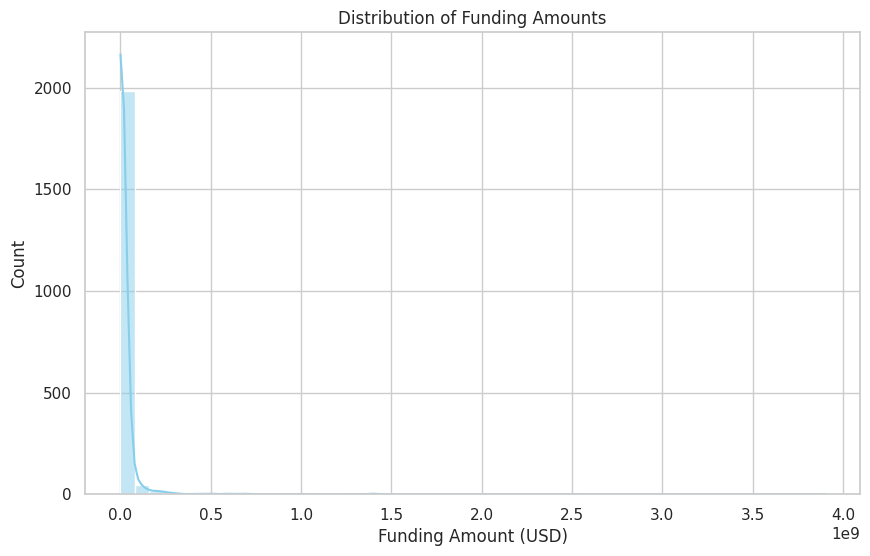

In [42]:
# Funding Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Amount_in_USD'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount (USD)')
plt.show()


Insight: The distribution is right-skewed, meaning a few startups raise huge amounts while most receive relatively small funding.

<ipython-input-43-1736934388>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_funding.values, y=type_funding.index, palette='coolwarm')


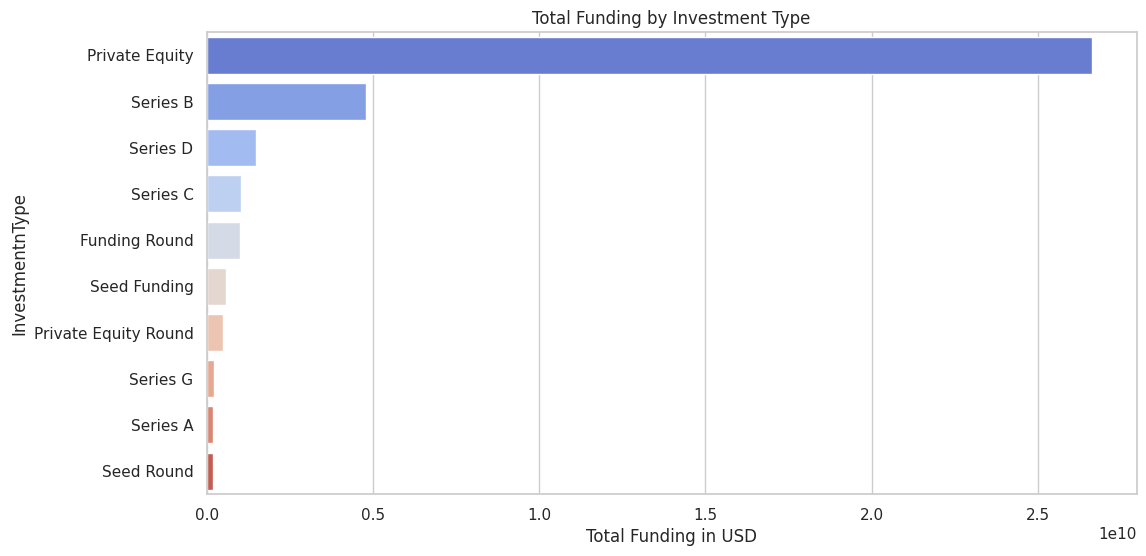

In [43]:
# Funding by Investment Type
plt.figure(figsize=(12, 6))
type_funding = df_clean.groupby('InvestmentnType')['Amount_in_USD'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=type_funding.values, y=type_funding.index, palette='coolwarm')
plt.title('Total Funding by Investment Type')
plt.xlabel('Total Funding in USD')
plt.show()


Insight: Certain funding types like Seed and Series A dominate early-stage investment trends.

In [44]:
# Filter top 10 cities to avoid overcrowding in scatter plot
top_cities = df_clean['City__Location'].value_counts().nlargest(10).index
df_top = df_clean[df_clean['City__Location'].isin(top_cities)]


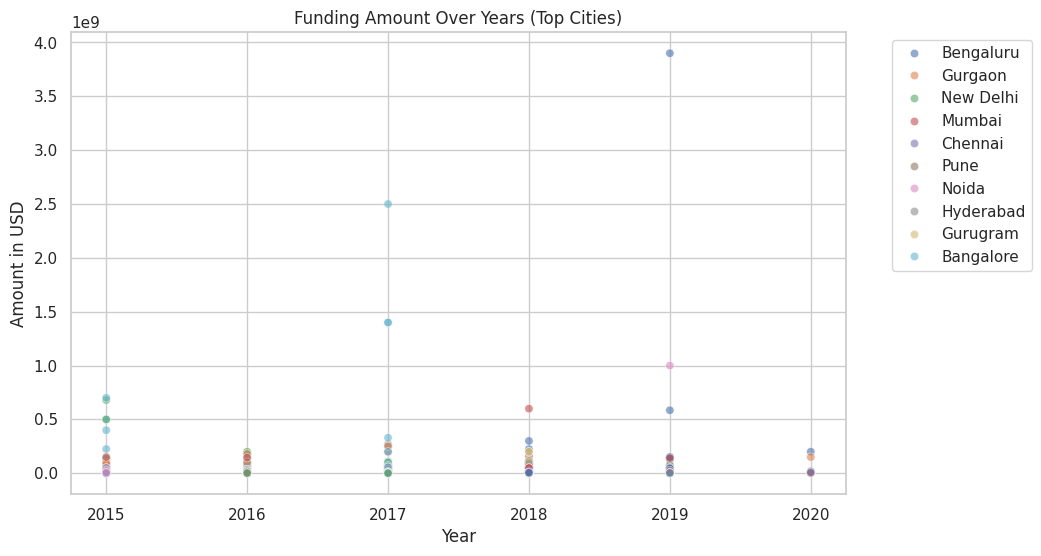

In [45]:
# Scatter plot: Funding Amount vs Year by Top Cities
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_top, x='Year', y='Amount_in_USD', hue='City__Location', alpha=0.6)
plt.title('Funding Amount Over Years (Top Cities)')
plt.ylabel('Amount in USD')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Insight: Shows spread and density of funding across different cities and years.

<ipython-input-46-2008609008>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_violin, x='Year', y='Amount_in_USD', inner='quartile', palette='Set2')


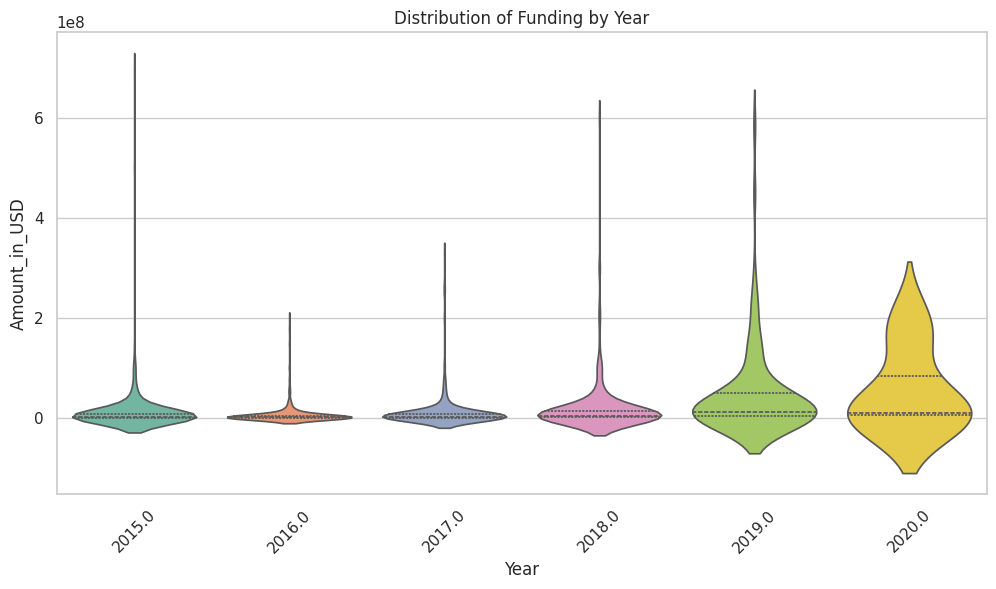

In [46]:
# Violin plot(remove extreme outliers): Funding amount distribution by Year (Filtered to remove extreme outliers)
df_violin = df_clean[df_clean['Amount_in_USD'] < 1e9]
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_violin, x='Year', y='Amount_in_USD', inner='quartile', palette='Set2')
plt.title('Distribution of Funding by Year')
plt.xticks(rotation=45)
plt.show()


Insight: Violin plots reveal spread, skewness, and peaks in funding distribution per year.

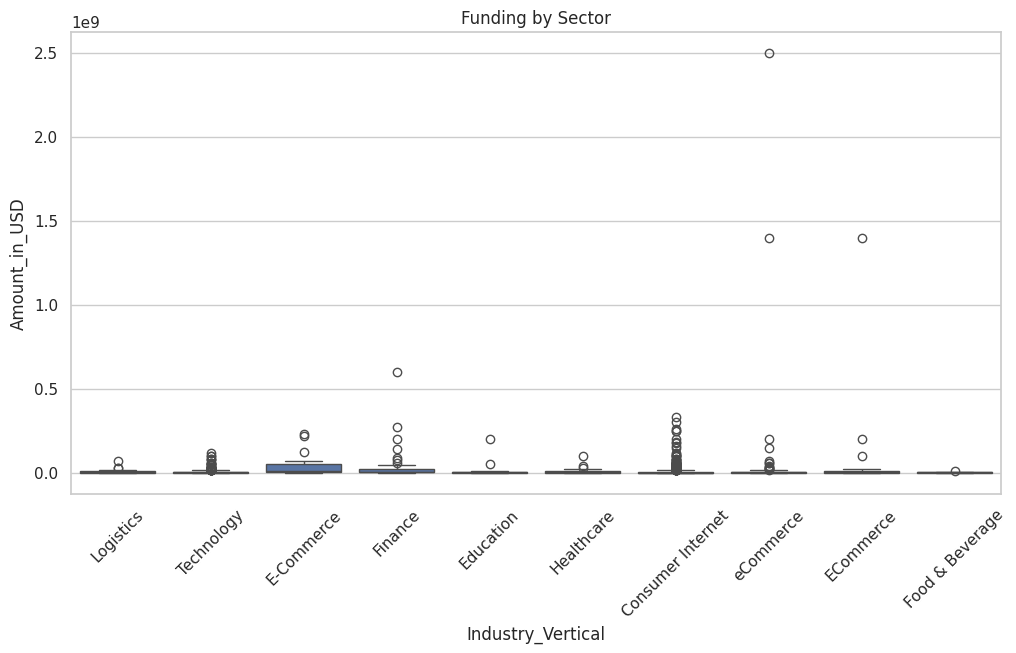

In [47]:
# --- Sector-wise Analysis ---
plt.figure(figsize=(12, 6))
top_sectors = df_clean['Industry_Vertical'].value_counts().nlargest(10).index
df_sector = df_clean[df_clean['Industry_Vertical'].isin(top_sectors)]
sns.boxplot(data=df_sector, x='Industry_Vertical', y='Amount_in_USD')
plt.xticks(rotation=45)
plt.title('Funding by Sector')
plt.show()

Insight: Sector-wise boxplots show which sectors receive higher median funding and have wider variability.

##**Time-Series Decomposition**
Time-series decomposition breaks a time series into four components:

1.Observed – the original time series

2.Trend – long-term increase or decrease in data

3.Seasonal – repeating short-term cycle (e.g., monthly)

4.Residual – what's left after removing trend and seasonality (noise or irregularities)



<ipython-input-53-2830954726>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Month'] = df_clean['Date_dd/mm/yyyy'].dt.to_period('M')


Month
2015-01-01    369321768.0
2015-02-01    394262600.0
2015-03-01    463327000.0
2015-04-01    980500000.0
2015-05-01    324185000.0
Name: Amount_in_USD, dtype: float64
DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '201

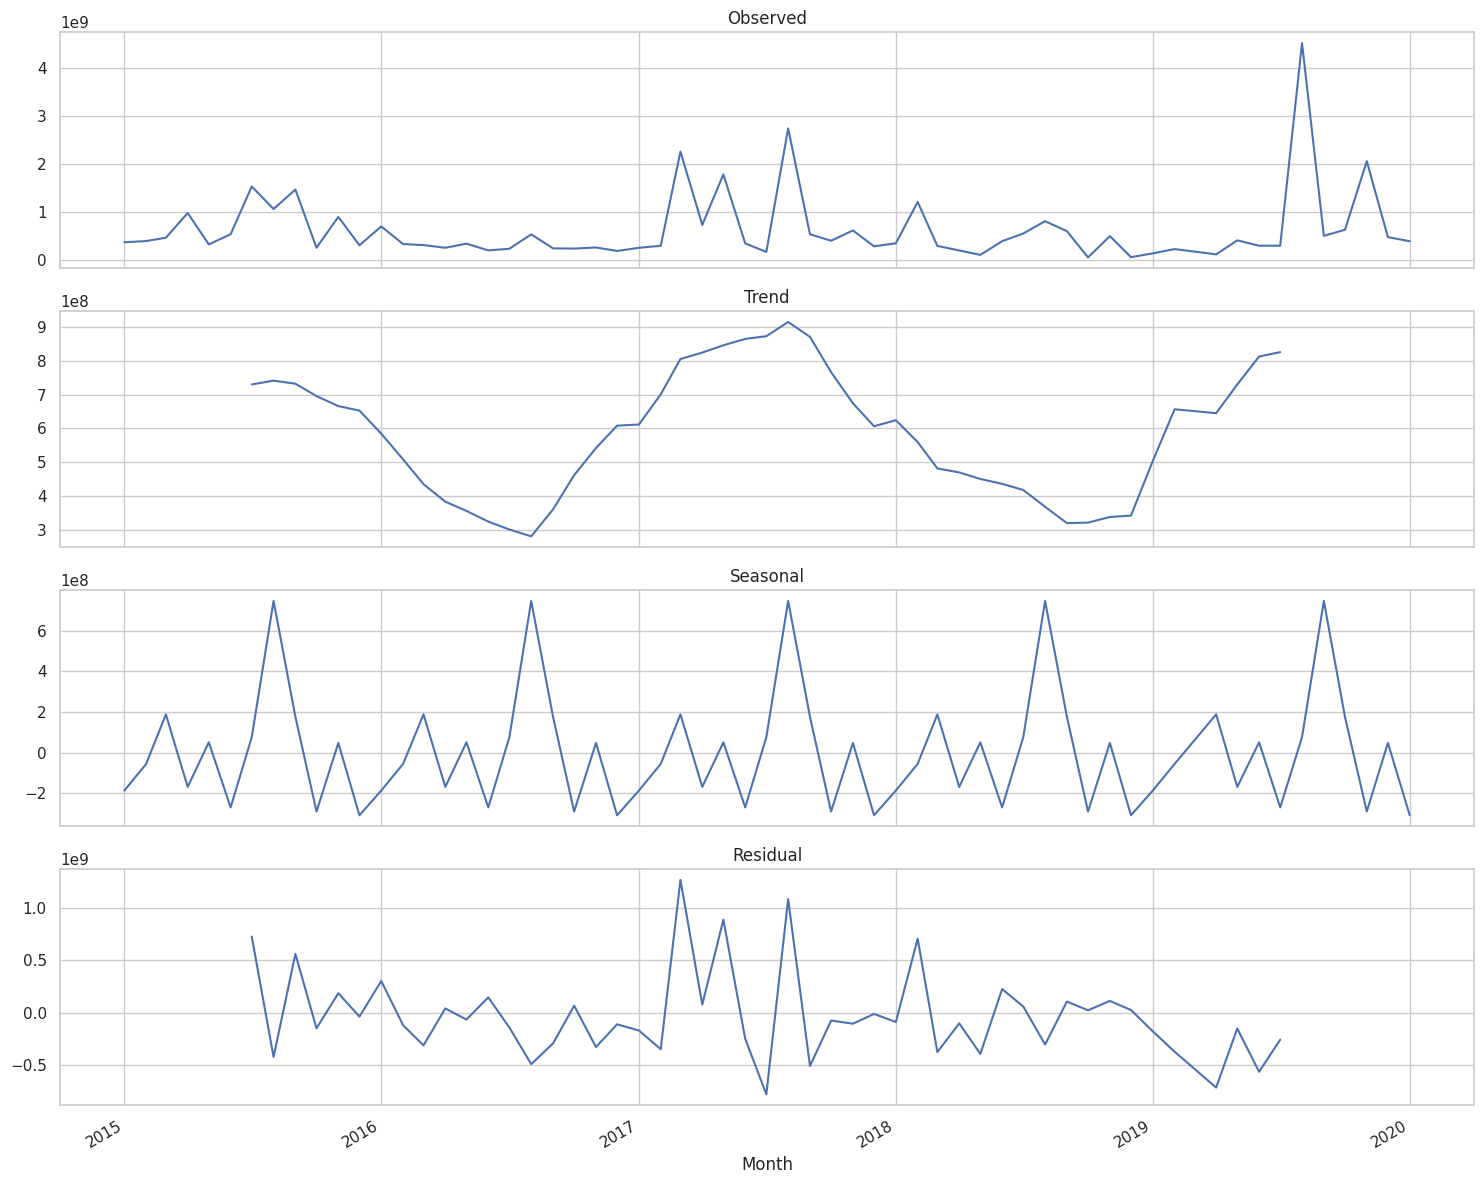

In [53]:
# --- Time-Series Decomposition ---
#import function
from statsmodels.tsa.seasonal import seasonal_decompose

#Re-create and convert the 'Month' column
df_clean['Month'] = df_clean['Date_dd/mm/yyyy'].dt.to_period('M')

# Group by Month and sum
df_monthly = df_clean.groupby('Month')['Amount_in_USD'].sum().dropna()

# Convert PeriodIndex to TimestampIndex (required by seasonal_decompose)
df_monthly.index = df_monthly.index.to_timestamp()

print(df_monthly.head())
print(df_monthly.index)

# Seasonal decomposition
decompose_result = seasonal_decompose(df_monthly, model='additive', period=12)

# Plot decomposition results
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
decompose_result.observed.plot(ax=axes[0], title='Observed')
decompose_result.trend.plot(ax=axes[1], title='Trend')
decompose_result.seasonal.plot(ax=axes[2], title='Seasonal')
decompose_result.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

Insight:

**1.Observed Plot:**

This shows the actual trend of startup funding month by month. We can observe some spikes indicating funding booms and drops that may correlate with external factors such as policy changes, market shifts, or economic events.

**2.Trend Plot:**

The trend component shows a clear upward/downward pattern over the years. A rising trend indicates increasing investor confidence and startup growth in India, while any dips could reflect funding slowdowns during uncertain periods.

**3.Seasonal Plot:**

This reveals if certain months consistently attract higher funding. For example, if Q1 shows higher values, it may suggest that new year or fiscal year planning influences investment decisions.

**4.Residual Plot:**

The residuals highlight outlier months — exceptionally high or low funding not part of a regular pattern. These could be linked to unique events like mega-rounds, unicorn announcements, or global economic disruptions like COVID-19.

###Summery:

I have performed time-series decomposition on monthly startup funding data to uncover underlying patterns. The **observed** series showed fluctuations in funding levels. The **trend** component highlighted a consistent increase in funding activity over time, reflecting growth in India's startup ecosystem. The **seasonal** pattern revealed that certain months tend to see more funding, likely due to financial or planning cycles. Finally, the **residuals** identified irregular spikes or dips, possibly caused by one-time investment events or external factors. This helps investors and policymakers better understand and anticipate funding behavior.

In [ ]:
# --- Save cleaned data ---
df_clean.to_csv("cleaned_startup_funding.csv", index=False)

##Conclusion

This case study successfully performs a comprehensive EDA on startup funding data in India. It identifies top-performing startups, cities, sectors, and investors. The time-series analysis and visual breakdowns enable a deeper understanding of investment patterns over time. This work is well-suited for showcasing Python data analysis skills, storytelling with data, and deriving actionable business insights.